In [57]:
''' 提取置信度：如果一个新的datapoint被分类为某个已知类别，可以训练SVM计算器置信度 '''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# load datasets
input_file = 'data_multivar.txt'

def load_data(input_file):
    X,Y = [],[]
    with open(input_file,'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data[:-1])
            Y.append(data[-1])
    return np.array(X),np.array(Y)

X,Y = load_data(input_file)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

params = {"kernel":"rbf","probability":True}
classifier = SVC(**params)
classifier.fit(X_train,y_train)
#print(classifier.decision_function(X_test))

# 测量数据点与边界的距离
input_datapoints = np.array([[2,1.5], [8,9], [4.8,5.2], [4,4], [2.5,7], [7.6,2],[5.4,5.9]])
#print(classifier.decision_function(input_datapoints))
print(type(classifier.decision_function(input_datapoints)))
print("\nDistance from the boundary:")
for i in range(len(input_datapoints)):
    print(input_datapoints[i],' --> ',classifier.decision_function(input_datapoints)[i])

# 概率输出：将不同的度量转换为概率，以衡量分类的输出概率
print(type(classifier.predict_proba(input_datapoints)))
print("\nConfidence measure:")
for i in range(len(input_datapoints)):
    print(input_datapoints[i],' --> ',classifier.predict_proba(input_datapoints)[i])


边界距离的数据类型： <class 'numpy.ndarray'>

Distance from the boundary:
[2.  1.5]  -->  1.4641534796440951
[8. 9.]  -->  1.2027833384010422
[4.8 5.2]  -->  -1.9202588134880436
[4. 4.]  -->  -0.13555127690004642
[2.5 7. ]  -->  0.6173950571872193
[7.6 2. ]  -->  2.0058455177573045
[5.4 5.9]  -->  -1.3395252492125262
<class 'numpy.ndarray'>

Confidence measure:
[2.  1.5]  -->  [0.01638517 0.98361483]
[8. 9.]  -->  [0.03362104 0.96637896]
[4.8 5.2]  -->  [0.99569532 0.00430468]
[4. 4.]  -->  [0.60184978 0.39815022]
[2.5 7. ]  -->  [0.15342562 0.84657438]
[7.6 2. ]  -->  [0.00360439 0.99639561]
[5.4 5.9]  -->  [0.97791533 0.02208467]


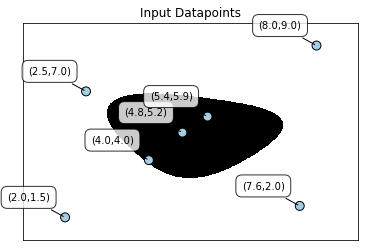

In [59]:
def plot_classifier(classifier, X, y, title='Classifier boundaries', annotate=False):
    # define ranges to plot the figure 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()

    # Set the title
    plt.title(title)

    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray, shading='auto')

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks(())
    plt.yticks(())

    if annotate:
        for x, y in zip(X[:, 0], X[:, 1]):
            # Full documentation of the function available here: 
            # http://matplotlib.org/api/text_api.html#matplotlib.text.Annotation
            plt.annotate(
                '(' + str(round(x, 1)) + ',' + str(round(y, 1)) + ')',
                xy = (x, y), xytext = (-15, 15), 
                textcoords = 'offset points', 
                horizontalalignment = 'right', 
                verticalalignment = 'bottom', 
                bbox = dict(boxstyle = 'round,pad=0.6', fc = 'white', alpha = 0.8),
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))
            
plot_classifier(classifier,input_datapoints,[0]*len(input_datapoints),'Input Datapoints','True')

In [73]:
# 训练最佳超优化参数
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report

parameter_grid = [
    {'kernel':['linear'], 'C':[1,10,50,600]},
    {'kernel':['poly'], 'degree': [2,3]},
    {'kernel':['rbf'], 'gamma':[0.01,0.001], 'C':[1,10,50,600]},
]

metrics = ['precision', 'recall_weighted']

for metric in metrics:
    print("\nSearching optimal hyperparameters for ",metric)
    classifier = GridSearchCV(svm.SVC(C=5), parameter_grid, cv=5, scoring=metric)
    classifier.fit(X_train,y_train)
    
    print("\nScores across the parameter grid:")
    print(classifier.cv_results_)
    
    '''
    grid_visualization = []
    for grid_pair in classifier.cv_results_['mean_test_score']:
        grid_visualization.append(grid_pair)
    grid_visualization = np.array(grid_visualization).reshape(2,7)
    plt.figure()
    plt.xticks(np.arange(4)+0.5, classifier.param_grid['max_features'])
    plt.yticks(np.arange(5)+0.5, classifier.param_grid['max_depth'][::-1])
    plt.xlabel('max_features')
    plt.ylabel('max_depth')
    plt.show()
    '''
    
    print("\nHighest scoring parameter set:",classifier.best_params_)
    y_true, y_pred = y_test, classifier.predict(X_test)
    print("\nFull performance report:\n")
    print(classification_report(y_true,y_pred))


Searching optimal hyperparameters for  precision

Scores across the parameter grid:
{'mean_fit_time': array([0.00279169, 0.00423422, 0.03914132, 0.27764249, 0.00400529,
       0.03145599, 0.00099902, 0.00299897, 0.00199866, 0.00099964,
       0.00099959, 0.00100169, 0.00099721, 0.00139871]), 'std_fit_time': array([7.45856519e-04, 2.22531692e-03, 4.52220677e-02, 3.14415281e-01,
       1.98527044e-03, 1.36667009e-02, 1.99804306e-03, 2.44874435e-03,
       2.44785304e-03, 1.99928284e-03, 1.99918747e-03, 1.54156665e-03,
       1.02934995e-06, 1.95872049e-03]), 'mean_score_time': array([0.00239415, 0.0017982 , 0.00079837, 0.00083742, 0.00080347,
       0.00239177, 0.00199957, 0.        , 0.00099936, 0.0009995 ,
       0.        , 0.00239782, 0.00099678, 0.00119271]), 'std_score_time': array([4.88851292e-04, 1.59976487e-03, 7.46709780e-04, 8.11371747e-04,
       7.47738427e-04, 2.15723218e-03, 2.44896180e-03, 0.00000000e+00,
       1.99871063e-03, 1.99899673e-03, 0.00000000e+00, 2.16492635e